In [3]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '1cc5375d-420b-4443-80a0-7944e4e21617',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2022-09-11T22:16:52.894Z', 'error_code': 0, 'error_message': None, 'elapsed': 70, 'credit_count': 1, 'notice': "You have used 100% of your plan's daily credit limit.", 'total_count': 9577}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9727, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capita

In [2]:
type(data)

dict

In [5]:
import pandas as pd
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%5f' % x)

In [6]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9727,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19148118.000000,19148118.000000,...,39.284400,453967194396.690002,None,2022-09-11T22:14:00.000Z,nan,NaN,NaN,NaN,NaN,2022-09-11 22:16:56.969540
1,1027,Ethereum,ETH,ethereum,6083,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",nan,122331659.311500,122331659.311500,...,20.285400,213729572181.980011,None,2022-09-11T22:14:00.000Z,nan,NaN,NaN,NaN,NaN,2022-09-11 22:16:56.969540
2,825,Tether,USDT,tether,39548,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",nan,67652203603.291359,69156782826.492813,...,6.422100,69173775912.889999,None,2022-09-11T22:14:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-11 22:16:56.969540
3,3408,USD Coin,USDC,usd-coin,6158,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,51604205337.300781,51604205337.300781,...,4.897300,51598280311.879997,None,2022-09-11T22:14:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-11 22:16:56.969540
4,1839,BNB,BNB,bnb,1099,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.000000,161337261.090000,161337261.090000,...,4.490900,58656083469.820000,None,2022-09-11T22:14:00.000Z,nan,NaN,NaN,NaN,NaN,2022-09-11 22:16:56.969540
5,4687,Binance USD,BUSD,binance-usd,5061,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",nan,20003342404.819256,20003342404.819256,...,1.898600,20004079326.869999,None,2022-09-11T22:14:00.000Z,1839.000000,BNB,BNB,bnb,BUSD-BD1,2022-09-11 22:16:56.969540
6,52,XRP,XRP,xrp,813,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000000,49826021773.000000,99989302361.000000,...,1.676300,35456569689.260002,None,2022-09-11T22:14:00.000Z,nan,NaN,NaN,NaN,NaN,2022-09-11 22:16:56.969540
7,2010,Cardano,ADA,cardano,568,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.000000,34182044152.629002,34854947575.480003,...,1.642900,22787737714.869999,None,2022-09-11T22:14:00.000Z,nan,NaN,NaN,NaN,NaN,2022-09-11 22:16:56.969540
8,5426,Solana,SOL,solana,380,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",nan,353283628.280455,511616946.142289,...,1.165700,17800982144.099998,None,2022-09-11T22:14:00.000Z,nan,NaN,NaN,NaN,NaN,2022-09-11 22:16:56.969540
9,6636,Polkadot,DOT,polkadot-new,408,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",nan,1116007261.620899,1231430931.946079,...,0.810500,9429683288.160000,None,2022-09-11T22:14:00.000Z,nan,NaN,NaN,NaN,NaN,2022-09-11 22:16:56.969540


In [7]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '1cc5375d-420b-4443-80a0-7944e4e21617',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\quort\OneDrive\Desktop\Data-Analyst-Portfolio\API.csv'):
        df.to_csv(r'C:\Users\quort\OneDrive\Desktop\Data-Analyst-Portfolio\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\quort\OneDrive\Desktop\Data-Analyst-Portfolio\API.csv', mode = 'a', header = False)
        
    

In [8]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for one minute
exit()

API Runner completed


KeyboardInterrupt: 

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9727,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19148118.000000,19148118.000000,...,39.284400,453967194396.690002,None,2022-09-11T22:14:00.000Z,nan,NaN,NaN,NaN,NaN,2022-09-11 22:17:03.666919
1,1027,Ethereum,ETH,ethereum,6083,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",nan,122331659.311500,122331659.311500,...,20.285400,213729572181.980011,None,2022-09-11T22:14:00.000Z,nan,NaN,NaN,NaN,NaN,2022-09-11 22:17:03.666919
2,825,Tether,USDT,tether,39548,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",nan,67652203603.291359,69156782826.492813,...,6.422100,69173775912.889999,None,2022-09-11T22:14:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-11 22:17:03.666919
3,3408,USD Coin,USDC,usd-coin,6158,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,51604205337.300781,51604205337.300781,...,4.897300,51598280311.879997,None,2022-09-11T22:14:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-11 22:17:03.666919
4,1839,BNB,BNB,bnb,1099,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.000000,161337261.090000,161337261.090000,...,4.490900,58656083469.820000,None,2022-09-11T22:14:00.000Z,nan,NaN,NaN,NaN,NaN,2022-09-11 22:17:03.666919
5,4687,Binance USD,BUSD,binance-usd,5061,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",nan,20003342404.819256,20003342404.819256,...,1.898600,20004079326.869999,None,2022-09-11T22:14:00.000Z,1839.000000,BNB,BNB,bnb,BUSD-BD1,2022-09-11 22:17:03.666919
6,52,XRP,XRP,xrp,813,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000000,49826021773.000000,99989302361.000000,...,1.676300,35456569689.260002,None,2022-09-11T22:14:00.000Z,nan,NaN,NaN,NaN,NaN,2022-09-11 22:17:03.666919
7,2010,Cardano,ADA,cardano,568,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.000000,34182044152.629002,34854947575.480003,...,1.642900,22787737714.869999,None,2022-09-11T22:14:00.000Z,nan,NaN,NaN,NaN,NaN,2022-09-11 22:17:03.666919
8,5426,Solana,SOL,solana,380,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",nan,353283628.280455,511616946.142289,...,1.165700,17800982144.099998,None,2022-09-11T22:14:00.000Z,nan,NaN,NaN,NaN,NaN,2022-09-11 22:17:03.666919
9,6636,Polkadot,DOT,polkadot-new,408,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",nan,1116007261.620899,1231430931.946079,...,0.810500,9429683288.160000,None,2022-09-11T22:14:00.000Z,nan,NaN,NaN,NaN,NaN,2022-09-11 22:17:03.666919


In [10]:
temp = pd.read_csv(r'C:\Users\quort\OneDrive\Desktop\Data-Analyst-Portfolio\API.csv')
temp

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9727,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000000,19146787.000000,...,39.061700,449104821892.190002,nan,2022-09-10T17:03:00.000Z,nan,NaN,NaN,NaN,NaN,2022-09-10 17:04:56.319851
1,1,1027,Ethereum,ETH,ethereum,6083,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",nan,122315793.436500,...,20.103800,210755289147.269989,nan,2022-09-10T17:03:00.000Z,nan,NaN,NaN,NaN,NaN,2022-09-10 17:04:56.319851
2,2,825,Tether,USDT,tether,39521,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",nan,67546203603.441360,...,6.445600,69178675300.990005,nan,2022-09-10T17:03:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-10 17:04:56.319851
3,3,3408,USD Coin,USDC,usd-coin,6156,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",nan,51660240439.237389,...,4.926900,51659595262.660004,nan,2022-09-10T17:03:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-10 17:04:56.319851
4,4,1839,BNB,BNB,bnb,1098,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.000000,161337261.090000,...,4.521300,58767197830.339996,nan,2022-09-10T17:03:00.000Z,nan,NaN,NaN,NaN,NaN,2022-09-10 17:04:56.319851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,10,74,Dogecoin,DOGE,dogecoin,560,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",nan,132670764299.894073,...,0.798300,8410493943.500000,nan,2022-09-11T22:14:00.000Z,nan,NaN,NaN,NaN,NaN,2022-09-11 22:17:03.666919
5021,11,3890,Polygon,MATIC,polygon,483,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'scaling'...",10000000000.000000,8734317475.284929,...,0.734900,8871741321.469999,nan,2022-09-11T22:14:00.000Z,nan,NaN,NaN,NaN,NaN,2022-09-11 22:17:03.666919
5022,12,5994,Shiba Inu,SHIB,shiba-inu,413,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",nan,549063278876301.937500,...,0.674000,7627064482.220000,nan,2022-09-11T22:14:00.000Z,1027.000000,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2022-09-11 22:17:03.666919
5023,13,4943,Dai,DAI,multi-collateral-dai,1331,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'asset-backed-stablecoi...",nan,6904361908.909560,...,0.655100,6904675205.130000,nan,2022-09-11T22:14:00.000Z,1027.000000,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2022-09-11 22:17:03.666919


In [11]:
df3 = temp.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.002707,1.001294,8.876179,-10.235200,9.751614,-7.874793
Ethereum,-0.142400,1.983612,12.604554,-7.630605,63.317150,42.170256
Tether,-0.000033,0.001951,0.021468,-0.004691,0.095428,0.151721
USD Coin,-0.000775,-0.002769,-0.014382,-0.003083,-0.029357,-0.033399
BNB,-0.018259,0.316113,5.840945,-9.007318,31.068317,29.794135
Binance USD,0.002511,-0.016010,-0.023620,-0.001300,-0.064124,-0.088844
XRP,0.053686,0.099167,7.526122,-4.977409,12.454893,11.655561
Cardano,-0.112943,0.237951,2.315344,-4.132855,21.251753,7.431308
Solana,-0.087233,1.775698,11.151638,-19.336395,4.985370,24.068115


In [12]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h      0.002707
           quote.USD.percent_change_24h     1.001294
           quote.USD.percent_change_7d      8.876179
           quote.USD.percent_change_30d   -10.235200
           quote.USD.percent_change_60d     9.751614
                                             ...    
Avalanche  quote.USD.percent_change_24h     1.270560
           quote.USD.percent_change_7d      8.370831
           quote.USD.percent_change_30d   -29.145431
           quote.USD.percent_change_60d    15.111815
           quote.USD.percent_change_90d    26.488773
Length: 90, dtype: float64

In [13]:
type(df4)

pandas.core.series.Series

In [14]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                             
Bitcoin   quote.USD.percent_change_1h    0.002707
          quote.USD.percent_change_24h   1.001294
          quote.USD.percent_change_7d    8.876179
          quote.USD.percent_change_30d -10.235200
          quote.USD.percent_change_60d   9.751614
...                                           ...
Avalanche quote.USD.percent_change_24h   1.270560
          quote.USD.percent_change_7d    8.370831
          quote.USD.percent_change_30d -29.145431
          quote.USD.percent_change_60d  15.111815
          quote.USD.percent_change_90d  26.488773

[90 rows x 1 columns]

In [15]:
df5.count()

values    90
dtype: int64

In [16]:
index=pd.Index(range(df5.count()['values']))
df6 = df5.reset_index()
df7 = df6.rename(columns = {'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.002707
1,Bitcoin,quote.USD.percent_change_24h,1.001294
2,Bitcoin,quote.USD.percent_change_7d,8.876179
3,Bitcoin,quote.USD.percent_change_30d,-10.235200
4,Bitcoin,quote.USD.percent_change_60d,9.751614
...,...,...,...
85,Avalanche,quote.USD.percent_change_24h,1.270560
86,Avalanche,quote.USD.percent_change_7d,8.370831
87,Avalanche,quote.USD.percent_change_30d,-29.145431
88,Avalanche,quote.USD.percent_change_60d,15.111815


In [17]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'], ['1h', '24h', '7d','30d', '60d', '90d'])

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

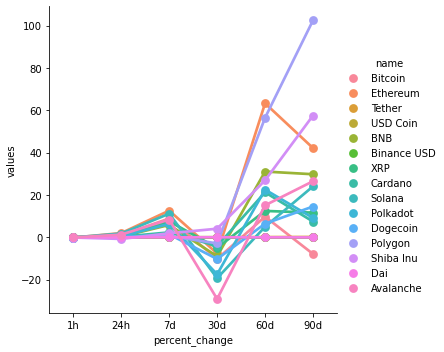

In [19]:
sns.catplot(x='percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [20]:
df9 = temp[['name', 'quote.USD.price','timestamp']] 
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,21385.943900,2022-09-10 17:04:56.319851
15,Bitcoin,21379.173908,2022-09-10 17:06:15.868653
30,Bitcoin,21691.574082,2022-09-11 16:24:20.675942
45,Bitcoin,21689.914188,2022-09-11 16:25:21.101541
60,Bitcoin,21672.726351,2022-09-11 16:26:21.338538
...,...,...,...
4950,Bitcoin,21576.238631,2022-09-11 21:55:08.421749
4965,Bitcoin,21566.127904,2022-09-11 21:56:08.636252
4980,Bitcoin,21546.838190,2022-09-11 21:57:08.914252
4995,Bitcoin,21550.313149,2022-09-11 21:58:09.281752


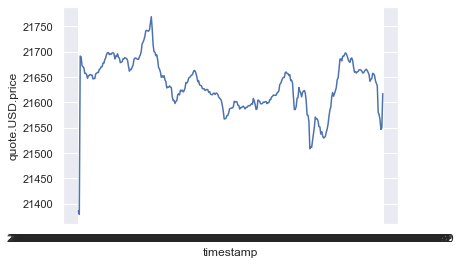

In [21]:
sns.set(style = 'darkgrid')

sns.lineplot(x='timestamp', y = 'quote.USD.price', data = df9)